# 1.3 Tensor?

## 목차

- Vector, Matrix, and Tensor
- Tensor 생성
- 산술 연산과 Broadcasting
- 자주 사용되는 연산 
- Tensor 차원 조작
- Tensor 합치기

## Vector, Matrix, and Tensor

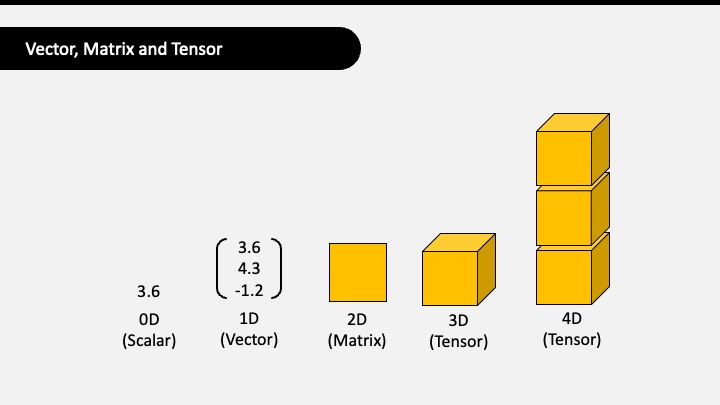

- 하나의 숫자, 값을 표현하는 것을 Scalar
- Scalar가 1차원으로 배열된 묶음을 Vector
- Vector가 모여서 2차원 데이터 형태가 되는 것이 Matrix
- Matrix가 모여서 만든 3 이상의 차원의 데이터 형태가 Tensor

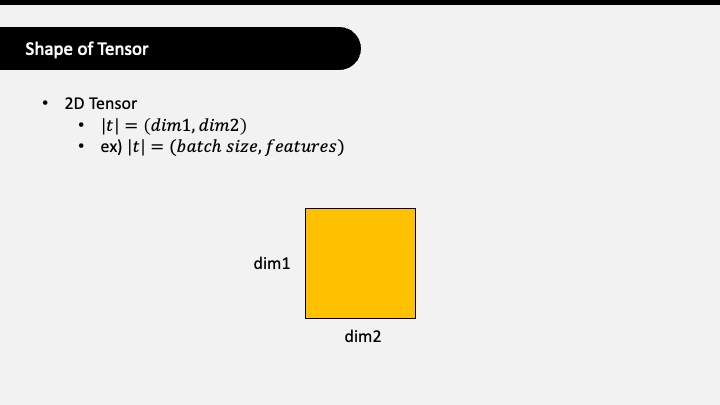

`t` 를 우리가 정의한 Tensor라고 했을 때, `|t|` 는 Tensor의 shape 즉 각 차원의 축의 갯수를 표현

2차원 텐서 2개의 차원(dimension)이 있는 텐서, 실제로는 첫번째 차원은 batch_size, 두번째 차원은 features를 나타냄

#### Batch Size
Batch Size는 한번에 처리할 샘플의 갯수!

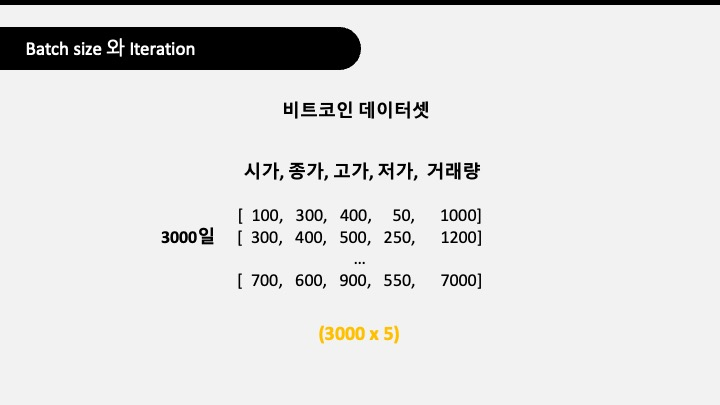

비트코인 데이터셋 샘플이 3000개, 각 샘플에는 [시가, 종가, 고가, 저가, 거래량] 5개의 특징(features)가 있음

==> 데이터셋의 shape은 (3000 x 5)



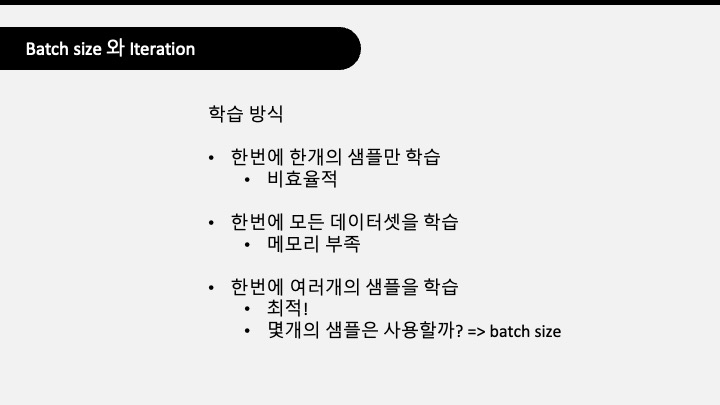

이 때, 한개씩 학습 할 수도 있고, 여러개를 묶음으로 나눌 수도 있고, 모든 샘플은 한번에 학습할 수도 있음. 가능한 많은 샘플을 한번에 처리하는 것이 더 빠르고 효율적이지만, 메모리의 한계로 모든 샘플을 한번에 학습하기 불가능함. 따라서 여러개의 묶음(batch)으로 나눠서 학습하게됨.


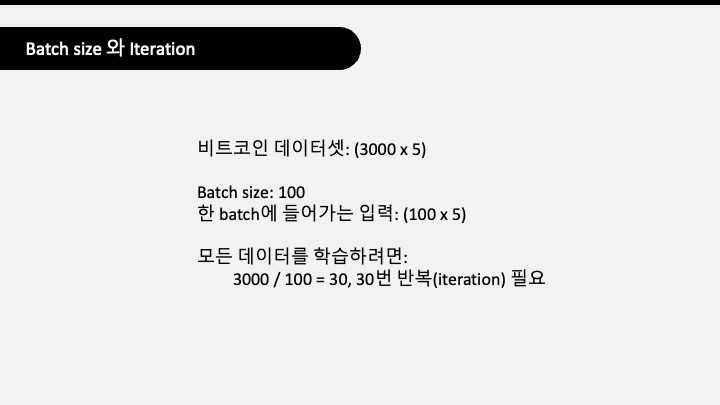


batch size 가 100 이라면, 한번에 학습하는 데이터는 (100 x 5)의 shape.

전체 데이터를 학습하기 위해서는 (3000/100 = 30) 30번의 반복이 필요함 ==> iteration

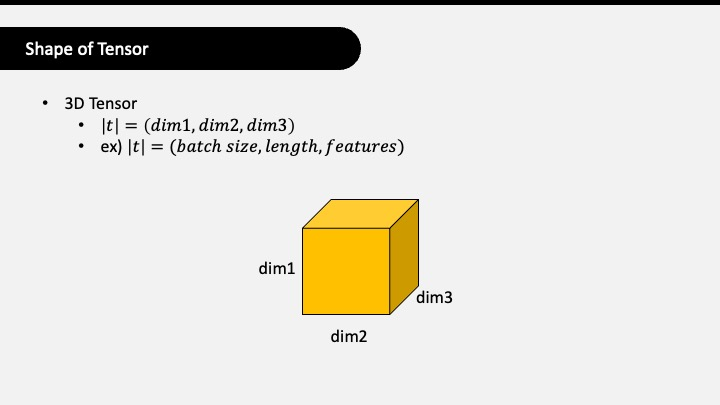

3차원 Tensor는 3개의 차원이 있으며, NLP 데이터를 3차원 Tensor로 표현한다고 하면 첫번째는 Batch_size, 두번째는 length 문자열의 길이, 세번째는 문자열을 나타내는 Features or Embedding vector로 표현 

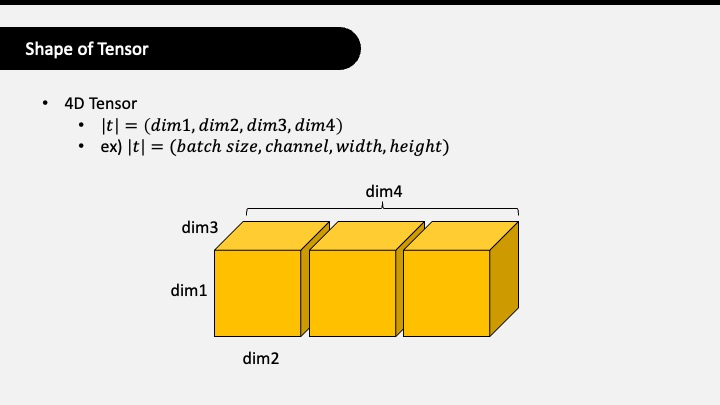

4차원 Tensor는 대표적으로 computer vision의 이미지 데이터를 표현하는데 사용. 첫번째는 Batch_size, 두번째는 channel (RGB, RGBA), 세번째와 네번째는 이미지의 width, height를 표현

In [18]:
import torch

## Tensor

PyTorch로 Tensor를 생성하는 법

### torch.Tensor() vs torch.tensor()

PyTorch에서 Tensor를 생성하는 방법은 다양합니다.
대표적으로 torch.tensor() 라는 함수를 사용하는 방법과, torch.Tensor() 라는 클래스를 사용하는 방법이 있음


- torch.tensor() 
  - 함수
  - input data type을 그대로 사용 
  - input data를 새로운 메모리 공간으로 복사
  - input data가 모두 같은 형태가 아니라면, 가장 넓은 범위의 type사용

- torch.Tensor()
  - 클래스
  - input data type을 Float 형태로 변경
  - input 이 tensor이라면, input의 메모리를 그대로 사용 (얕은 복사)
  - input 이 list, numpy라면, 새로운 메모리 공간으로 복사

클래스를 사용하는 Tensor생성 방법은 torch.Tensor 이외에도, torch.FloatTensor, torch.ByteTensor, torch.BoolTensor등 다양한 타입의 텐서가 존재.

*data-type [공식문서](https://pytorch.org/docs/stable/tensors.html#data-types) 참고

> 한 Tensor에 여러개의 타입을 공존시킬 수 없음
>
> [1, 0.3, True] >> python list는 각 타입을 유지하면서 저장 가능
>
> torch.tensor([1, 0.3, True]) >> 하나의 타입으로 변경됨 (float)

In [19]:
data = [1, 0.3, True]

print("list:\t", data)
print("tensor:\t", torch.tensor(data))

list:	 [1, 0.3, True]
tensor:	 tensor([1.0000, 0.3000, 1.0000])


### 1D Tensor (Vector)

In [16]:
t = torch.tensor([1., 3., 5., 7., 9., 4])
t

tensor([1., 3., 5., 7., 9., 4.])

In [17]:
print(t.dim())  # rank
print(t.shape)  # shape
print(t.size()) # shape

1
torch.Size([6])
torch.Size([6])


In [10]:
print(t[0], t[3], t[-1])  # Element
print(t[1:4], t[3:-1])    # Slicing
print(t[:3], t[4:])       # Slicing

tensor(1.) tensor(7.) tensor(4.)
tensor([3., 5., 7.]) tensor([7., 9.])
tensor([1., 3., 5.]) tensor([9., 4.])


### 2D Array

In [12]:
t = torch.tensor([[1.,  3.,  5.],
                  [7.,  9., 11.],
                  [2.,  4.,  6.],
                  [8., 10., 12.],
                  ])
t

tensor([[ 1.,  3.,  5.],
        [ 7.,  9., 11.],
        [ 2.,  4.,  6.],
        [ 8., 10., 12.]])

In [14]:
print(t.dim())  # rank
print(t.shape)  # shape

2
torch.Size([4, 3])


In [25]:
print(t[0, 0], t[3, -1])   # Element
print()
print(t[0], t[0, :])      # Vector
print(t[0].shape)         # Vector shape
print()
print(t[:, 2])            # Vector
print(t[:, 2].shape)      # Vector shape
print()
print(t[1:4, :2])        # Matrix Slicing

tensor(1.) tensor(12.)

tensor([1., 3., 5.]) tensor([1., 3., 5.])
torch.Size([3])

tensor([ 5., 11.,  6., 12.])
torch.Size([4])

tensor([[ 7.,  9.],
        [ 2.,  4.],
        [ 8., 10.]])


## 많이 사용되는 Tensor 생성 방법

직접 값을 넣어주는 방법 이외에도 다양한 방법이 있음

- 기본 함수
  - shape을 입력으로 받아서 tensor를 반환
- _likes 함수
  - tensor를 입력으로 받아서 입력과 같은 크기의 tensor를 반환

### Empty
입력 shape에 맞는 비어있는 tensor를 생성
> 비어있다 = 초기화를 하지 않는다 (의미있는 값이 들어있지 않다)

In [16]:
t = torch.empty([3, 4])
t

tensor([[-9.9889e-20,  3.0743e-41,  1.5975e-43,  1.3873e-43],
        [ 1.4574e-43,  6.4460e-44,  1.4153e-43,  1.5274e-43],
        [ 1.5695e-43,  1.6255e-43,  1.6956e-43,  1.3312e-43]])


In [27]:
print(torch.empty_like(t))
print(torch.empty(t.shape))

tensor([[[-7.9344e-20,  3.0743e-41,  1.5975e-43,  1.3873e-43],
         [ 1.4574e-43,  6.4460e-44,  1.4153e-43,  1.5274e-43]]])
tensor([[[-7.9344e-20,  3.0743e-41,  1.5975e-43,  1.3873e-43],
         [ 1.4574e-43,  6.4460e-44,  1.4153e-43,  1.5274e-43]]])


### Zeors
입력 shape에 맞는 0으로 채워진 tensor 생성

In [19]:
t = torch.zeros([3, 2, 2])
t

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

In [20]:
torch.zeros_like(t)

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

### Ones
입력 shape에 맞는 1로 채워진 tensor 생성

In [21]:
t = torch.ones([2, 3, 4])
t

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [22]:
torch.ones_like(t)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

### Full
지정한 값으로 채워진 Tensor 생성

In [25]:
t = torch.full([1, 2, 4], 7)
t

tensor([[[7., 7., 7., 7.],
         [7., 7., 7., 7.]]])

In [26]:
torch.full_like(t, 9)

tensor([[[9., 9., 9., 9.],
         [9., 9., 9., 9.]]])

### Random
랜덤한 값으로 tensor를 생성할 수 있음

- torch.rand
  - [0, 1) 의 범위에서 랜덤한 값으로 채워진 Tensor 생성
- torch.randn
  - 평균 0, 분산 1인 normal distribution을 갖는 랜덤한 Tensor 생성
- torch.randint
  - [low, high) uniform distribution을 갖는 랜던한 int Tensor 생성 

In [11]:
print(torch.rand([3, 4]))

tensor([[0.1879, 0.2372, 0.9285, 0.7402],
        [0.0359, 0.3728, 0.7143, 0.8994],
        [0.9355, 0.0651, 0.9968, 0.5308]])


In [12]:
print(torch.randn([2, 3]))

tensor([[-1.9804,  0.1125,  0.5881],
        [ 0.6453,  1.0908, -0.7654]])


In [14]:
print(torch.randint(0, 5, [2, 4]))

tensor([[0, 2, 2, 0],
        [4, 2, 1, 1]])


### Arange
python 의 range와 마찬가지로 연속적인 숫자 텐서를 반환

In [8]:
torch.arange(0, 16)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [9]:
torch.arange(start=0, end=16, step=2)

tensor([ 0,  2,  4,  6,  8, 10, 12, 14])

## 산술 연산과 Broadcasting

### Add

In [26]:
# same shape
t1 = torch.tensor([[1, 3]])
t2 = torch.tensor([[2, 2]])
print(t1 + t2)

tensor([[3, 5]])


In [28]:
# Vector + Scalar
t1 = torch.tensor([[1, 3]])   
t2 = torch.tensor([2])        # [2] => [[2, 2]] 
print(t1 + t2)                # [[1, 3]] + [[2, 2]]

tensor([[3, 5]])


In [30]:
# 2 x 1 Vector + 1 x 2 Vector
t1 = torch.tensor([[1, 3]])         # [[1, 3]] => [[1, 3],
                                    #              [1, 3]]
t2 = torch.tensor([[2], [4]])       # [[2],    => [[2, 2],
                                    #  [4]]        [4, 4]]
print(t1 + t2)

tensor([[3, 5],
        [5, 7]])


### Multiplication and Matrix Multiplication

In [16]:
t1 = torch.tensor([[1, 2], [3, 4]])
t2 = torch.tensor([[2], [4]])
print(t1.shape, t2.shape)

torch.Size([2, 2]) torch.Size([2, 1])


In [17]:
print(t1 * t2)            # [[1, 2],  *   [[2, 2], 
                          #  [3, 4]]       [4, 4]]
print(t1.mul(t2))
print(torch.mul(t1, t2))
print()
print(torch.mul(t1, t2).shape)

tensor([[ 2,  4],
        [12, 16]])
tensor([[ 2,  4],
        [12, 16]])
tensor([[ 2,  4],
        [12, 16]])

torch.Size([2, 2])


In [39]:
print(t1.matmul(t2))
print(torch.matmul(t1, t2))
print()
print(t1.matmul(t2).shape)

tensor([[10],
        [22]])
tensor([[10],
        [22]])

torch.Size([2, 1])


## 자주 사용되는 연산

### Sum

Tensor의 합

In [13]:
t = torch.tensor([[1, 2], [3, 4], [5, 6]])
print(t.shape)
print(t)

torch.Size([3, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [17]:
print(t.sum())      # 전체 합
print(t.sum(dim=0)) # 0 번째 차원을 기준으로 합, 0차원 제거
print(t.sum(dim=1)) # 1 번째 차원을 기준으로 합
print(t.sum(dim=-1)) # 1 번째 차원을 기준으로 합

tensor(21)
tensor([ 9, 12])
tensor([ 3,  7, 11])
tensor([ 3,  7, 11])


### Mean
Tensor의 평균

In [31]:
t = torch.tensor([[[1., 2.], [3., 4.], [5., 6.]], [[7., 8.], [9., 10.], [11., 12.]]])
print(t.shape)
print(t)

torch.Size([2, 3, 2])
tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[ 7.,  8.],
         [ 9., 10.],
         [11., 12.]]])


In [37]:
print(t.mean())      # 전체 평균

tensor(6.5000)


In [38]:
print(t.mean(dim=0)) # 0 번째 차원을 기준으로 평균, 0차원 제거
print(t[:, 0, 0], t[:, 0, 0].mean())    # 결과의 첫번째 원소

tensor([[4., 5.],
        [6., 7.],
        [8., 9.]])
tensor([1., 7.]) tensor(4.)


### Max, Min & Argmax, Argmin
최대값, 최소값과 최대값의 위치, 최소값의 위치

In [39]:
t = torch.tensor([[[1., 2.], [3., 4.], [5., 6.]],[[7., 8.], [9., 10.], [11., 12.]]])
print(t.shape)
print(t)

torch.Size([2, 3, 2])
tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[ 7.,  8.],
         [ 9., 10.],
         [11., 12.]]])


In [70]:
print(t.max())
print(t.min())

tensor(12.)
tensor(1.)


In [72]:
print(t.max(dim=0))

torch.return_types.max(
values=tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]]),
indices=tensor([[1, 1, 1],
        [1, 1, 1]]))


In [51]:
v, i = t.max(dim=1)
print(v)
print(i)
print()
print(t[0, :, 0])
print(t[0, :, 0][2])


tensor([[ 5.,  6.],
        [11., 12.]])
tensor([[2, 2],
        [2, 2]])

tensor([1., 3., 5.])
tensor(5.)


In [56]:
print(t.argmax())
print(t.flatten().max(dim=0)[1])

tensor(11)
tensor(11)


In [58]:
print(t.argmax(dim=1))
print(t.max(dim=1)[1])

tensor([[2, 2],
        [2, 2]])
tensor([[2, 2],
        [2, 2]])


In [73]:
print(t.argmin(dim=1))
print(t.min(dim=1)[1])

tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[0, 0, 0],
        [0, 0, 0]])


## Tensor 차원 조작
Tensor에는 다양한 차원의 데이터를 저장할 수 있고 이를 자유자재로 조작할 수 있는 연산을 지원
- 데이터는 유지 (element 개수 유지)
- shape 만 변경

### View
Tensor의 shape 변경


In [67]:
t = torch.tensor([[[1., 2., 3.], [4., 5., 6.]],[[7., 8., 9.], [ 10., 11., 12.]]])
print(t)

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.]],

        [[ 7.,  8.,  9.],
         [10., 11., 12.]]])


In [66]:
print(t.shape)

torch.Size([2, 2, 3])


1. tensor의 차원을 축소 (3D >> 2D)

In [81]:
print(t.view([4, 3]))       # (4, 3) shape으로 변경
print(t.view([4, 3]).shape)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
torch.Size([4, 3])


In [82]:
print(t.view([2,-1]))       # (2, -1) shape으로 변경
print(t.view([2,-1]).shape)

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.],
        [ 7.,  8.,  9., 10., 11., 12.]])
torch.Size([2, 6])


2. tensor의 shape 변경 (3D >> 3D)

In [87]:
print(t.view([1, 2, -1]))       # (1, 2, -1) shape으로 변경
print(t.view([1, 2, -1]).shape)

tensor([[[ 1.,  2.,  3.,  4.,  5.,  6.],
         [ 7.,  8.,  9., 10., 11., 12.]]])
torch.Size([1, 2, 6])


In [88]:
print(t.view([1, 3, -1]))       # (1, 3, -1) shape으로 변경
print(t.view([1, 3, -1]).shape)

tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]]])
torch.Size([1, 3, 4])


### Permute

dim의 위치를 변경

In [92]:
t = torch.tensor([[[1., 2., 3.], [4., 5., 6.]]])
print(t)

tensor([[[1., 2., 3.],
         [4., 5., 6.]]])


In [93]:
t.shape

torch.Size([1, 2, 3])

In [95]:
t.permute([1, 2, 0]).shape

torch.Size([2, 3, 1])

In [96]:
t.permute([1, 2, 0])

tensor([[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]]])

In [97]:
t.view([2, 3, 1])

tensor([[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]]])

### Squeeze
size 가 1 인 차원을 제거

In [20]:
t = torch.rand([3, 1, 4, 1])

In [21]:
print(t.squeeze().shape)
print(t.squeeze(dim=1).shape)
print(t.view([3, 4]).shape)

torch.Size([3, 4])
torch.Size([3, 4, 1])
torch.Size([3, 4])


### Unsqueeze
size 가 1인 dimention 삭제

In [107]:
t = torch.rand([3, 4])

In [114]:
print(t.unsqueeze(dim=0).shape)
print(t.unsqueeze(dim=2).shape)
print(t.view([3, 4, 1]).shape)

torch.Size([1, 3, 4])
torch.Size([3, 4, 1])
torch.Size([3, 4, 1])


## 텐서 합치기
여러개의 텐서를 하나로 합치기

### cat
여러개의 텐서를 지정한 dim 을 기준으로 합치기

In [23]:
x = torch.randn(2, 3)
x

tensor([[ 0.8076,  0.1035,  0.4711],
        [-0.4539, -1.0354, -0.4482]])

In [24]:
print(torch.cat((x, x, x), dim=0))
print(torch.cat((x, x, x), 0).shape)

tensor([[ 0.8076,  0.1035,  0.4711],
        [-0.4539, -1.0354, -0.4482],
        [ 0.8076,  0.1035,  0.4711],
        [-0.4539, -1.0354, -0.4482],
        [ 0.8076,  0.1035,  0.4711],
        [-0.4539, -1.0354, -0.4482]])
torch.Size([6, 3])


In [24]:
print(torch.cat((x, x, x), 1))
print(torch.cat((x, x, x), 1).shape)

tensor([[-1.6627, -0.2707,  0.4182, -1.6627, -0.2707,  0.4182, -1.6627, -0.2707,
          0.4182],
        [ 0.6084,  1.1566, -1.3890,  0.6084,  1.1566, -1.3890,  0.6084,  1.1566,
         -1.3890]])
torch.Size([2, 9])


- 지정한 dimention 이외의 차원은 같아야함

In [26]:
x1 = torch.rand(2, 3)
x2 = torch.rand(1, 3)
x3 = torch.rand(3, 3)

print(torch.cat([x1, x2, x3], 0))
print(torch.cat([x1, x2, x3], 0).shape)

tensor([[0.8252, 0.1406, 0.1474],
        [0.7216, 0.7235, 0.7022],
        [0.1556, 0.9211, 0.7182],
        [0.5859, 0.6596, 0.3731],
        [0.1116, 0.8749, 0.7483],
        [0.5260, 0.0067, 0.6376]])
torch.Size([6, 3])


### stack
새로운 차원을 생성하고 합치기

In [8]:
x = torch.randn(2,)
x

tensor([-0.6701,  0.6946])

In [9]:
print(torch.stack((x, x, x)))
print(torch.stack((x, x, x)).shape)

tensor([[-0.6701,  0.6946],
        [-0.6701,  0.6946],
        [-0.6701,  0.6946]])
torch.Size([3, 2])


In [10]:
print(torch.cat((x.unsqueeze(0), x.unsqueeze(0), x.unsqueeze(0)), 0))

tensor([[-0.6701,  0.6946],
        [-0.6701,  0.6946],
        [-0.6701,  0.6946]])


In [11]:
print(torch.stack((x, x, x), dim=1))
print(torch.stack((x, x, x), dim=1).shape)

tensor([[-0.6701, -0.6701, -0.6701],
        [ 0.6946,  0.6946,  0.6946]])
torch.Size([2, 3])
